<a href="https://colab.research.google.com/github/jungeKatz/Hematologic-Malignancies/blob/main/Hematologic__disorder_class_learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1VeQwL3Y64o8clWJIzoYobqADs01PPXBM/view?usp=sharing

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import gdown

In [ ]:
# print(gdown.__version__)  # this should be 4.3.0
# !pip install --upgrade --no-cache-dir gdown
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!wget --no-check-certificate "https://drive.google.com/uc?id=1VeQwL3Y64o8clWJIzoYobqADs01PPXBM&export=download" -O hem.zip

In [ ]:
# !gdown --id 1VeQwL3Y64o8clWJIzoYobqADs01PPXBM

In [ ]:
!unzip /content/gdrive/MyDrive/BM_cytomorphology_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05001.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05002.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05003.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05004.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05005.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05006.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05007.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05008.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05009.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05010.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05011.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05012.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05013.jpg  
  inflating: BM_cytomorphology_data/PMO/5001-6000/PMO_05014.jpg  
  inflating: BM_cytomorph

In [ ]:

# # !pip install split-folders
# # import splitfolders # or import splitfolders
# from pathlib import Path
# import imghdr
# count =0
# data_dir = "/content/BM_cytomorphology_data"
# image_extensions = [".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
   
#     if filepath.suffix.lower() in image_extensions:
       
#         img_type = imghdr.what(filepath)
        
#         if img_type is None:
#             print(f"{filepath} is not an image")
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [33]:
!rm -rf /content/BM_cytomorphology_data/MYB/5001-6000/MYB_05527.jpg
#/content/BM_cytomorphology_data/MYB/5001-6000/MYB_05706.jpg
# input_folder = "/content/BM_cytomorphology_data"
# output = "/content/split_data" 

# splitfolders.ratio(input_folder, output=output, seed=76, ratio=(.80, .0 , .2))


In [38]:
data_dir_train = pathlib.Path("/content/BM_cytomorphology_data")

In [39]:
image_count_train = len(list(data_dir_train.rglob('*/*.jpg')))
print(image_count_train)

171372


In [40]:
batch_size = 7
img_height = 50
img_width = 50
image_size = (50, 50)

In [41]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    color_mode='rgb',
   
    validation_split=0.2,
    subset="training",
    seed=123,
    interpolation='bilinear',
    image_size=image_size,
    batch_size=batch_size,
)

Found 171372 files belonging to 21 classes.
Using 137098 files for training.


In [42]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    color_mode='rgb',
   
    validation_split=0.2,
    subset="validation",
    seed=123,
    interpolation='bilinear',
    image_size=image_size,
    batch_size=batch_size,
)

Found 171372 files belonging to 21 classes.
Using 34274 files for validation.


In [43]:
class_names = train_ds.class_names
print(class_names)

['ABE', 'ART', 'BAS', 'BLA', 'EBO', 'EOS', 'FGC', 'HAC', 'KSC', 'LYI', 'LYT', 'MMZ', 'MON', 'MYB', 'NGB', 'NGS', 'NIF', 'OTH', 'PEB', 'PLM', 'PMO']


In [44]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[int(labels[i])])
#         plt.axis("off")

In [45]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(7, 50, 50, 3)
(7,)


In [46]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [47]:
num_classes = 21

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [48]:
### chose adam optimizer and SparseCategoricalCrossentropy as loss function 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)       

In [50]:
epochs = 10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
19586/19586 [==============================] - 386s 19ms/step - loss: 1.2066 - accuracy: 0.6183 - val_loss: 1.0608 - val_accuracy: 0.6673
Epoch 2/10
19586/19586 [==============================] - 130s 7ms/step - loss: 0.9079 - accuracy: 0.7106 - val_loss: 0.8942 - val_accuracy: 0.7163
Epoch 3/10
19586/19586 [==============================] - 129s 7ms/step - loss: 0.8258 - accuracy: 0.7366 - val_loss: 0.8558 - val_accuracy: 0.7305
Epoch 4/10
19586/19586 [==============================] - 129s 7ms/step - loss: 0.7770 - accuracy: 0.7514 - val_loss: 0.8916 - val_accuracy: 0.7227
Epoch 5/10
19586/19586 [==============================] - 130s 7ms/step - loss: 0.7410 - accuracy: 0.7617 - val_loss: 0.9521 - val_accuracy: 0.7150
Epoch 6/10
19586/19586 [==============================] - 128s 7ms/step - loss: 0.7125 - accuracy: 0.7699 - val_loss: 0.8629 - val_accuracy: 0.7360
Epoch 7/10
19586/19586 [==============================] - 129s 7ms/step - loss: 0.6910 - accuracy: 0.7762 - val

In [ ]:
# # !pip install split-folders
# # import splitfolders # or import splitfolders
# from pathlib import Path
# import tensorflow as tf
# import imghdr
# count =0
# data_dir = "/content/BM_cytomorphology_data/NGS/"
# image_extensions = [".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
   
#     if filepath.suffix.lower() in image_extensions:
#      with tf.Graph().as_default():
#       image_contents = tf.io.read_file(str(filepath))
#       image = tf.image.decode_jpeg(image_contents, channels=3)
#       #init_op = tf.initialize_all_tables()
#       init = tf.compat.v1.initialize_all_tables()
#       with tf.compat.v1.Session() as sess:
#         print(filepath)
#         sess.run(init)
#         tmp = sess.run(image)

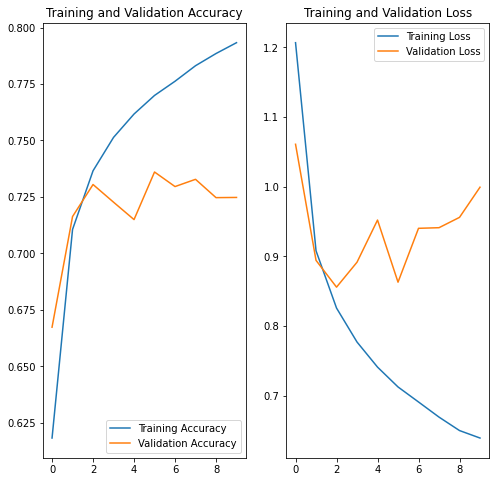

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [70]:
from matplotlib import pyplot as plt
classvals =[]
for i in class_names:
 classvals.append(len(list(data_dir_train.rglob(i+'*/*'+'*/*.jpg'))))

In [71]:
print(class_names)
print(classvals)

['ABE', 'ART', 'BAS', 'BLA', 'EBO', 'EOS', 'FGC', 'HAC', 'KSC', 'LYI', 'LYT', 'MMZ', 'MON', 'MYB', 'NGB', 'NGS', 'NIF', 'OTH', 'PEB', 'PLM', 'PMO']
[8, 19630, 441, 11973, 27395, 5883, 47, 409, 42, 65, 26242, 3055, 4040, 6555, 9968, 29424, 3538, 294, 2740, 7629, 11994]


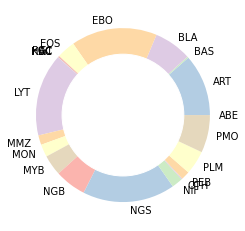

<Figure size 5688x5688 with 0 Axes>

In [75]:
names = class_names
size = classvals
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.figure(figsize=(79, 79))
# Show the graph
plt.show()

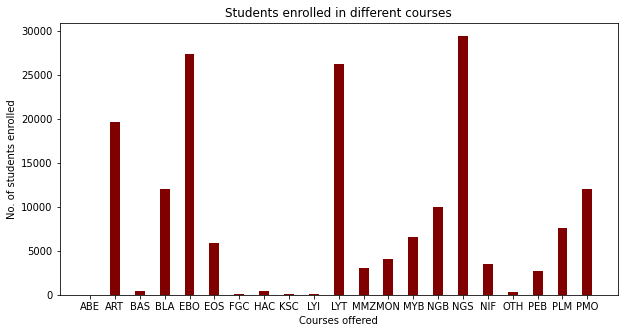

In [76]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
courses = class_names
values = classvals
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [77]:
!pip install Augmentor

In [79]:
path_to_training_dataset=str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + '/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) 

Initialised with 8 image(s) found.
Output directory set to /content/BM_cytomorphology_data/ABE/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCEA867E350>: 100%|██████████| 1000/1000 [00:11<00:00, 87.59 Samples/s]


Initialised with 19630 image(s) found.
Output directory set to /content/BM_cytomorphology_data/ART/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCDB9112A10>: 100%|██████████| 1000/1000 [00:11<00:00, 86.35 Samples/s]


Initialised with 441 image(s) found.
Output directory set to /content/BM_cytomorphology_data/BAS/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2CB63150>: 100%|██████████| 1000/1000 [00:11<00:00, 84.68 Samples/s]


Initialised with 11973 image(s) found.
Output directory set to /content/BM_cytomorphology_data/BLA/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCDB5295C10>: 100%|██████████| 1000/1000 [00:12<00:00, 80.20 Samples/s]


Initialised with 27395 image(s) found.
Output directory set to /content/BM_cytomorphology_data/EBO/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2EAB5E10>: 100%|██████████| 1000/1000 [00:11<00:00, 88.50 Samples/s]


Initialised with 5883 image(s) found.
Output directory set to /content/BM_cytomorphology_data/EOS/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCEAAD225D0>: 100%|██████████| 1000/1000 [00:11<00:00, 89.59 Samples/s]


Initialised with 47 image(s) found.
Output directory set to /content/BM_cytomorphology_data/FGC/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7FCEAACF2450>: 100%|██████████| 1000/1000 [00:11<00:00, 85.03 Samples/s]


Initialised with 409 image(s) found.
Output directory set to /content/BM_cytomorphology_data/HAC/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7FCEA8A52290>: 100%|██████████| 1000/1000 [00:10<00:00, 91.07 Samples/s]


Initialised with 42 image(s) found.
Output directory set to /content/BM_cytomorphology_data/KSC/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2FD9D1D0>: 100%|██████████| 1000/1000 [00:11<00:00, 85.80 Samples/s]


Initialised with 65 image(s) found.
Output directory set to /content/BM_cytomorphology_data/LYI/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7FCEAB36ECD0>: 100%|██████████| 1000/1000 [00:11<00:00, 84.75 Samples/s]


Initialised with 26242 image(s) found.
Output directory set to /content/BM_cytomorphology_data/LYT/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2D9C5850>: 100%|██████████| 1000/1000 [00:12<00:00, 81.65 Samples/s]


Initialised with 3055 image(s) found.
Output directory set to /content/BM_cytomorphology_data/MMZ/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2F4B3E50>: 100%|██████████| 1000/1000 [00:12<00:00, 80.54 Samples/s]


Initialised with 4040 image(s) found.
Output directory set to /content/BM_cytomorphology_data/MON/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2FB41E10>: 100%|██████████| 1000/1000 [00:12<00:00, 79.73 Samples/s]


Initialised with 6555 image(s) found.
Output directory set to /content/BM_cytomorphology_data/MYB/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2F69F510>: 100%|██████████| 1000/1000 [00:12<00:00, 79.31 Samples/s]


Initialised with 9968 image(s) found.
Output directory set to /content/BM_cytomorphology_data/NGB/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2F68AB90>: 100%|██████████| 1000/1000 [00:11<00:00, 83.70 Samples/s]


Initialised with 29424 image(s) found.
Output directory set to /content/BM_cytomorphology_data/NGS/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCE2DB67B50>: 100%|██████████| 1000/1000 [00:11<00:00, 84.92 Samples/s]


Initialised with 3538 image(s) found.
Output directory set to /content/BM_cytomorphology_data/NIF/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7FCDB8DA5AD0>: 100%|██████████| 1000/1000 [00:12<00:00, 82.74 Samples/s]


Initialised with 294 image(s) found.
Output directory set to /content/BM_cytomorphology_data/OTH/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCEAAFF2BD0>: 100%|██████████| 1000/1000 [00:12<00:00, 81.16 Samples/s]


Initialised with 2740 image(s) found.
Output directory set to /content/BM_cytomorphology_data/PEB/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7FCDB910D1D0>: 100%|██████████| 1000/1000 [00:12<00:00, 80.08 Samples/s]


Initialised with 7629 image(s) found.
Output directory set to /content/BM_cytomorphology_data/PLM/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7FCDB8ED67D0>: 100%|██████████| 1000/1000 [00:11<00:00, 83.48 Samples/s] 


Initialised with 11994 image(s) found.
Output directory set to /content/BM_cytomorphology_data/PMO/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7FCE306E0A10>: 100%|██████████| 1000/1000 [00:11<00:00, 83.77 Samples/s]
